In [2]:
# Dependencies and set up
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# data file 
southregion_path="South_data.csv"

# read data file
southregion=pd.read_csv(southregion_path)


In [3]:
# check column index
# southregion.columns
# check dataframe
southregion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,South,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,South,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,South,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54626,West Virginia,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.78,76.66,24.25,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
54627,West Virginia,South,Male,Good,10,5,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.75,90.72,29.53,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
54628,West Virginia,South,Female,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",...,1.63,82.55,31.24,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
54629,West Virginia,South,Male,Very good,2,4,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.73,77.11,25.85,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [15]:
# Replacing categorical/object data into integers
southregion.PhysicalActivities.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadHeartAttack.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadStroke.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadAsthma.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadSkinCancer.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadCOPD.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadDepressiveDisorder.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadKidneyDisease.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadArthritis.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.AlcoholDrinkers.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.SmokerStatus.replace(('Former smoker', 'Never smoked', 'Current smoker - now smokes every day',
                                  'Current smoker - now smokes some days'), (0,1,2,3,), inplace=True)
southregion.ECigaretteUsage.replace(('Never used e-cigarettes in my entire life', 'Not at all (right now)',
                                     'Use them some days', 'Use them every day'), (0,1,2,3,), inplace=True)
southregion.RaceEthnicityCategory.replace(('White only, Non-Hispanic', 'Black only, Non-Hispanic', 'Hispanic',
                                   'Mulitracial, Non-Hispanic', 'Other race only, Non-Hispanic'), (0,1,2,3,4), inplace=True)
southregion.GeneralHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (0,1,2,3,4), inplace=True)
southregion.RemovedTeeth.replace(('None of them', '1 to 5', '6 or more, but not all',
                                  'All'), (0,1,2,3,), inplace=True)


southregion.head()


,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,South,Female,1,4,0,Within past year (anytime less than 12 months ...,1,9,0,...,1.60,71.67,27.99,0,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,South,Male,1,0,0,Within past year (anytime less than 12 months ...,1,6,0,...,1.78,95.25,30.13,0,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,South,Male,1,0,0,Within past year (anytime less than 12 months ...,0,8,2,...,1.85,108.86,31.66,1,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,South,Female,3,5,0,Within past year (anytime less than 12 months ...,1,9,0,...,1.70,90.72,31.32,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,South,Female,2,3,15,Within past year (anytime less than 12 months ...,1,5,1,...,1.55,79.38,33.07,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
hrtattack_sr=southregion.groupby('HadHeartAttack')['HadHeartAttack'].count()
hrtattack_sr

HadHeartAttack
0    51189
1     3442
Name: HadHeartAttack, dtype: int64

In [6]:
hrtattack_sr.index

Int64Index([0, 1], dtype='int64', name='HadHeartAttack')

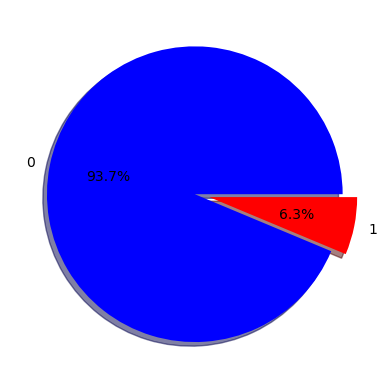

In [9]:
labels=hrtattack_sr.index
colors=['blue', 'red']
explode=(0,0.1)
plt.pie(hrtattack_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

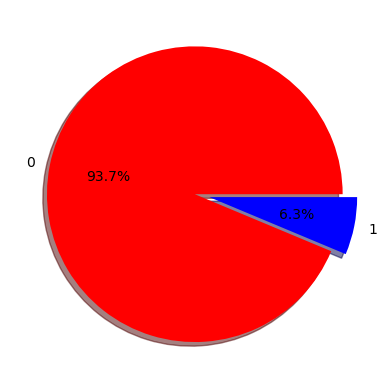

In [21]:
labels=hrtattack_sr.index
colors=['red', 'blue']
explode=(0,0.1)
plt.pie(hrtattack_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


In [10]:
stroke_sr=southregion.groupby('HadStroke')['HadStroke'].count()
stroke_sr

HadStroke
0    51773
1     2858
Name: HadStroke, dtype: int64

In [11]:
stroke_sr.index

Int64Index([0, 1], dtype='int64', name='HadStroke')

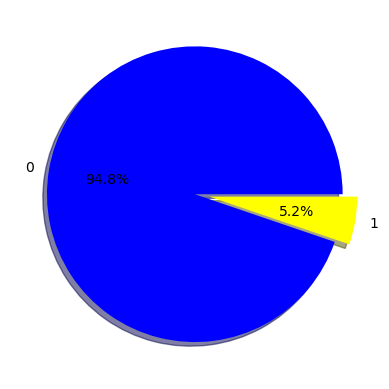

In [12]:
labels=stroke_sr.index
colors=['blue', 'yellow']
explode=(0,0.1)
plt.pie(stroke_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

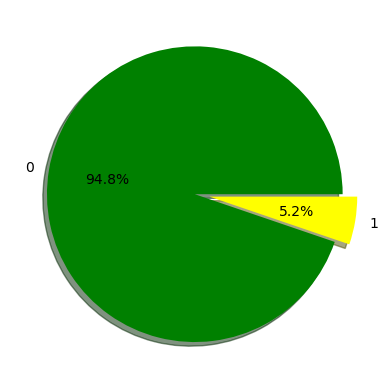

In [25]:
labels=stroke_sr.index
colors=['green', 'yellow']
explode=(0,0.1)
plt.pie(stroke_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [38]:
states_sr=southregion.groupby(['State'])['State'].count()
states_sr

State
Alabama           1902
Arkansas          2940
Florida           7315
Georgia           4978
Kentucky          2413
Louisiana         3010
Mississippi       2438
North Carolina    2551
Oklahoma          2941
South Carolina    5471
Tennessee         2725
Texas             7408
Virginia          5565
West Virginia     2974
Name: State, dtype: int64

In [31]:
average_bmi_state=southregion.groupby(['State'])['BMI'].mean()
average_bmi_state

State
Alabama           29.474543
Arkansas          29.213888
Florida           28.568051
Georgia           29.013072
Kentucky          29.522768
Louisiana         29.396684
Mississippi       30.211550
North Carolina    28.750282
Oklahoma          29.308385
South Carolina    28.894487
Tennessee         29.304037
Texas             29.245875
Virginia          28.836013
West Virginia     29.882629
Name: BMI, dtype: float64

In [32]:
average_weight_state=southregion.groupby(['State'])['WeightInKilograms'].mean()
average_weight_state

State
Alabama           85.225899
Arkansas          85.361796
Florida           83.155785
Georgia           84.332240
Kentucky          86.781960
Louisiana         85.162787
Mississippi       88.322797
North Carolina    83.730953
Oklahoma          85.517429
South Carolina    84.046443
Tennessee         86.237325
Texas             84.894035
Virginia          83.822634
West Virginia     86.697505
Name: WeightInKilograms, dtype: float64

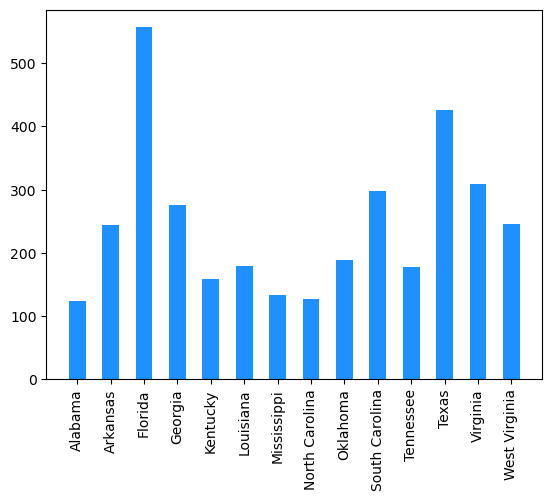

In [42]:
hrtattack_state=southregion[southregion['HadHeartAttack']==1].groupby('State').size()
# hrtattack_state
xvalue=np.arange(len(hrtattack_state))
yvalue=hrtattack_state
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [45]:
 hrtattack_state

State
Alabama           124
Arkansas          244
Florida           557
Georgia           276
Kentucky          158
Louisiana         179
Mississippi       133
North Carolina    127
Oklahoma          188
South Carolina    298
Tennessee         177
Texas             426
Virginia          309
West Virginia     246
dtype: int64

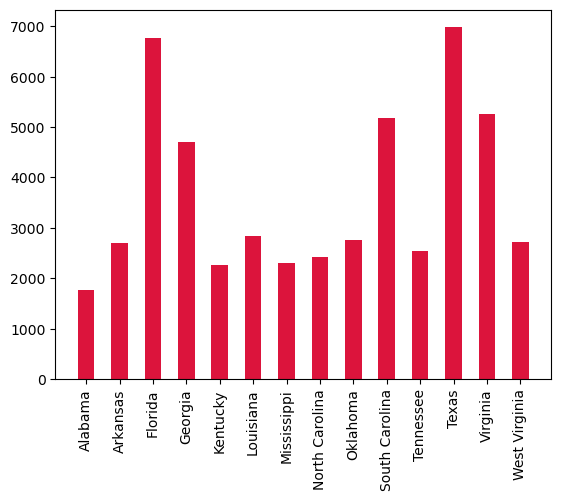

In [44]:
Nohrtattack_state=southregion[southregion['HadHeartAttack']==0].groupby('State').size()
xvalue=np.arange(len(Nohrtattack_state))
yvalue=Nohrtattack_state
plt.bar(xvalue,yvalue, color='crimson', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [46]:
Nohrtattack_state

State
Alabama           1778
Arkansas          2696
Florida           6758
Georgia           4702
Kentucky          2255
Louisiana         2831
Mississippi       2305
North Carolina    2424
Oklahoma          2753
South Carolina    5173
Tennessee         2548
Texas             6982
Virginia          5256
West Virginia     2728
dtype: int64

In [47]:
# Sex breakdown
Sex_id=southregion.groupby('Sex')['Sex'].count()
Sex_id

Sex
Female    29453
Male      25178
Name: Sex, dtype: int64

In [55]:
Nohrtattack_sex=southregion[southregion['HadHeartAttack']==0].groupby('Sex').size()
Nohrtattack_sex.index

Index(['Female', 'Male'], dtype='object', name='Sex')

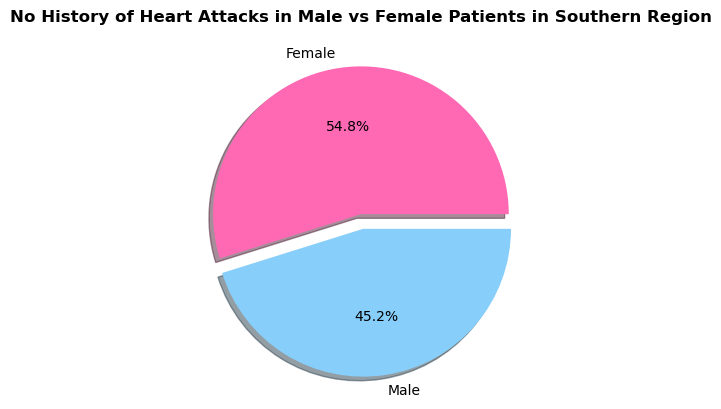

In [58]:
colors=['hotpink','lightskyblue']
labels=Nohrtattack_sex.index
explode=(0, 0.1)
plt.pie(Nohrtattack_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attacks in Male vs Female Patients in Southern Region", fontweight='bold')
plt.show()

In [57]:
hrtattack_sex=southregion[southregion['HadHeartAttack']==1].groupby('Sex').size()
hrtattack_sex.index

Index(['Female', 'Male'], dtype='object', name='Sex')

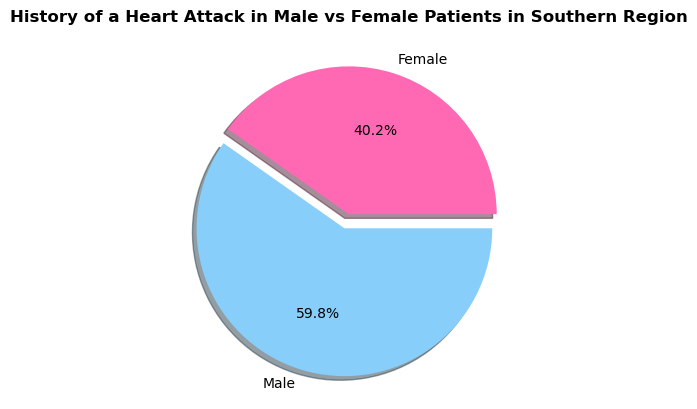

In [59]:
colors=['hotpink','lightskyblue']
labels=hrtattack_sex.index
explode=(0, 0.1)
plt.pie(hrtattack_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of a Heart Attack in Male vs Female Patients in Southern Region", fontweight='bold')
plt.show()

In [63]:
Nostroke_state=southregion[southregion['HadStroke']==0].groupby('State').size()
Nostroke_state

State
Alabama           1778
Arkansas          2744
Florida           6886
Georgia           4732
Kentucky          2269
Louisiana         2847
Mississippi       2316
North Carolina    2437
Oklahoma          2806
South Carolina    5224
Tennessee         2574
Texas             7097
Virginia          5285
West Virginia     2778
dtype: int64

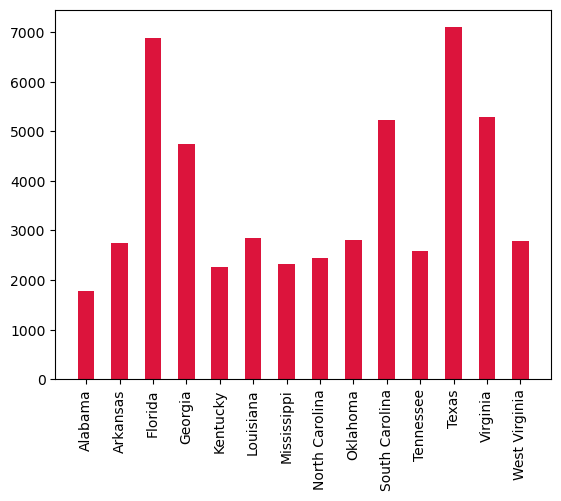

In [61]:
Nostroke_state=southregion[southregion['HadStroke']==0].groupby('State').size()
xvalue=np.arange(len(Nostroke_state))
yvalue=Nostroke_state
plt.bar(xvalue,yvalue, color='crimson', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [62]:
stroke_state=southregion[southregion['HadStroke']==1].groupby('State').size()
stroke_state

State
Alabama           124
Arkansas          196
Florida           429
Georgia           246
Kentucky          144
Louisiana         163
Mississippi       122
North Carolina    114
Oklahoma          135
South Carolina    247
Tennessee         151
Texas             311
Virginia          280
West Virginia     196
dtype: int64

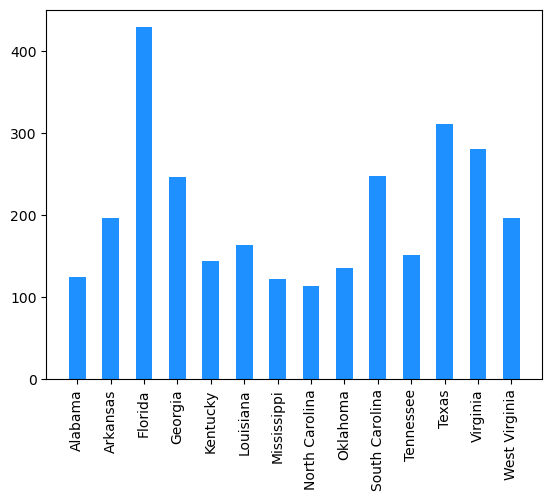

In [64]:
stroke_state=southregion[southregion['HadStroke']==1].groupby('State').size()
# hrtattack_state
xvalue=np.arange(len(stroke_state))
yvalue=stroke_state
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [68]:
Heart_Stroke_bystate=southregion[["State","HadHeartAttack","HadStroke"]]
Heart_Stroke_bystate=Heart_Stroke_bystate.set_index("State")
Heart_Stroke_bystate

,HadHeartAttack,HadStroke
State,,
Alabama,0,0
Alabama,0,0
Alabama,0,0
Alabama,0,0
Alabama,0,0
...,...,...
West Virginia,0,0
West Virginia,0,0
West Virginia,0,0


In [16]:
smoke_sr=southregion.groupby('SmokerStatus')['SmokerStatus'].count()
smoke_sr

SmokerStatus
0    15217
1    31910
2     5493
3     2011
Name: SmokerStatus, dtype: int64

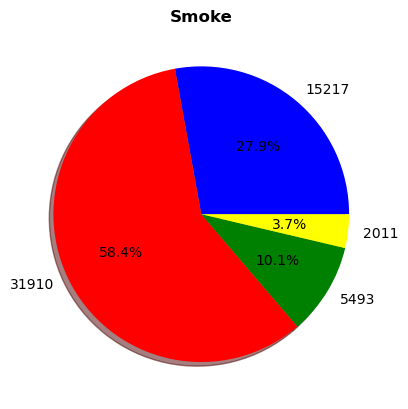

In [18]:
labels=smoke_sr
colors=['blue','red','green', 'yellow']
plt.pie(smoke_sr, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Smoke", fontweight='bold')
plt.show()

In [19]:
removedteeth_sr=southregion.groupby('RemovedTeeth')['RemovedTeeth'].count()
removedteeth_sr

RemovedTeeth
0    26679
1    16831
2     6979
3     4142
Name: RemovedTeeth, dtype: int64

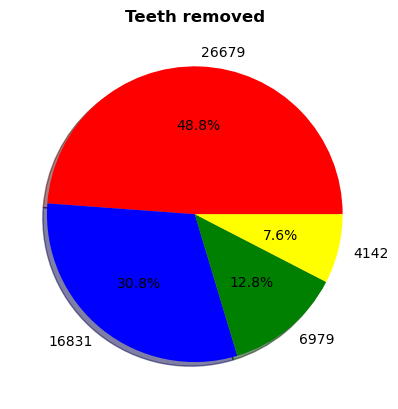

In [20]:
labels=removedteeth_sr
colors=['red','blue','green', 'yellow']
plt.pie(removedteeth_sr, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Teeth removed", fontweight='bold')
plt.show()